<a href="https://colab.research.google.com/github/putrirahmawati1205/PCVK_Ganjil_2023/blob/main/Week_5_Assignment_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


1. Make a Gamma Correction according to the following instructions


Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 0.3


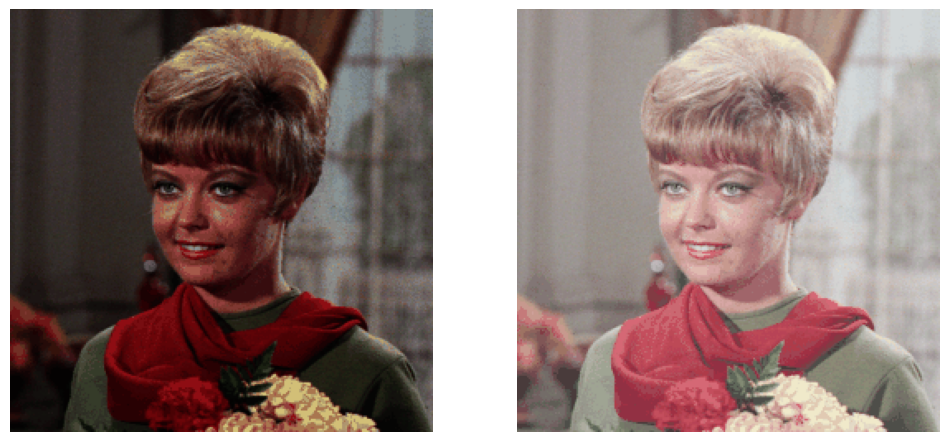

True

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print('Gamma Correction pada citra')
print('----------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    exit()

image_path = '/content/drive/MyDrive/PCVK/female.tiff'
output_path = '/content/drive/MyDrive/PCVK/gamma_corrected_image.tiff'

image = cv2.imread(image_path)

if image is None:
    print(f'Error: Unable to load image from {image_path}')
    exit()

gamma_corrected = np.power(image / 255.0, gamma)
gamma_corrected = (gamma_corrected * 255).astype(np.uint8)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
cv2.imwrite(output_path, gamma_corrected)


2.  Create Image Depth Simulation

Original Image


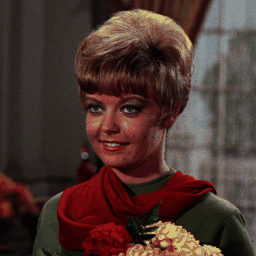

Simulated 2.0-bit Depth Image


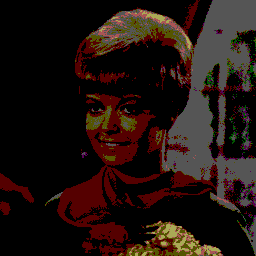

In [37]:
import cv2
import numpy as np

# Load the original image
original_image = cv2.imread('/content/drive/MyDrive/PCVK/female.tiff')

# Specify the target bit depth
target_bit_depth = 2.0

# Calculate the number of levels for the target bit depth
num_levels = 2 ** target_bit_depth

# Perform the bit depth reduction
quantized_image = (original_image * (num_levels - 1) // 255) * (255 // (num_levels - 1))

# Display the original and simulated depth images
print('Original Image')
cv2_imshow(original_image)
print(f'Simulated {target_bit_depth}-bit Depth Image')
cv2_imshow(quantized_image)

3. Create the Average Denoising module

In [45]:
import cv2
import glob
import numpy as np

# Load the original image
original_image_path = '/content/drive/MyDrive/PCVK/galaxy.jpg'
original_image = cv2.imread(original_image_path)

# Function to calculate PSNR
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Load noisy images
noisy_images = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    noisy_img = cv2.imread(img)
    noisy_images.append(noisy_img)

# Record the PSNR results
psnr_results = []
average_image = np.zeros_like(original_image, dtype=np.float32)

for i, noisy_img in enumerate(noisy_images):
    average_image += noisy_img / len(noisy_images)
    psnr = calculate_psnr(original_image, average_image)
    psnr_results.append((i + 1, psnr))

# Display PSNR results
print("No. of Images in Average | PSNR Value (dB)")
for psnr_result in psnr_results:
    print(f"{psnr_result[0]:<23} | {psnr_result[1]:.2f}")

No. of Images in Average | PSNR Value (dB)
1                       | 11.51
2                       | 11.62
3                       | 11.73
4                       | 11.84
5                       | 11.95
6                       | 12.06
7                       | 12.18
8                       | 12.30
9                       | 12.42
10                      | 12.54
11                      | 12.66
12                      | 12.78
13                      | 12.91
14                      | 13.03
15                      | 13.16
16                      | 13.29
17                      | 13.42
18                      | 13.56
19                      | 13.69
20                      | 13.83
21                      | 13.97
22                      | 14.11
23                      | 14.25
24                      | 14.40
25                      | 14.55
26                      | 14.70
27                      | 14.85
28                      | 15.00
29                      | 15.16
30                      | 15.

4. Create image masking for the following image.

Image Masking


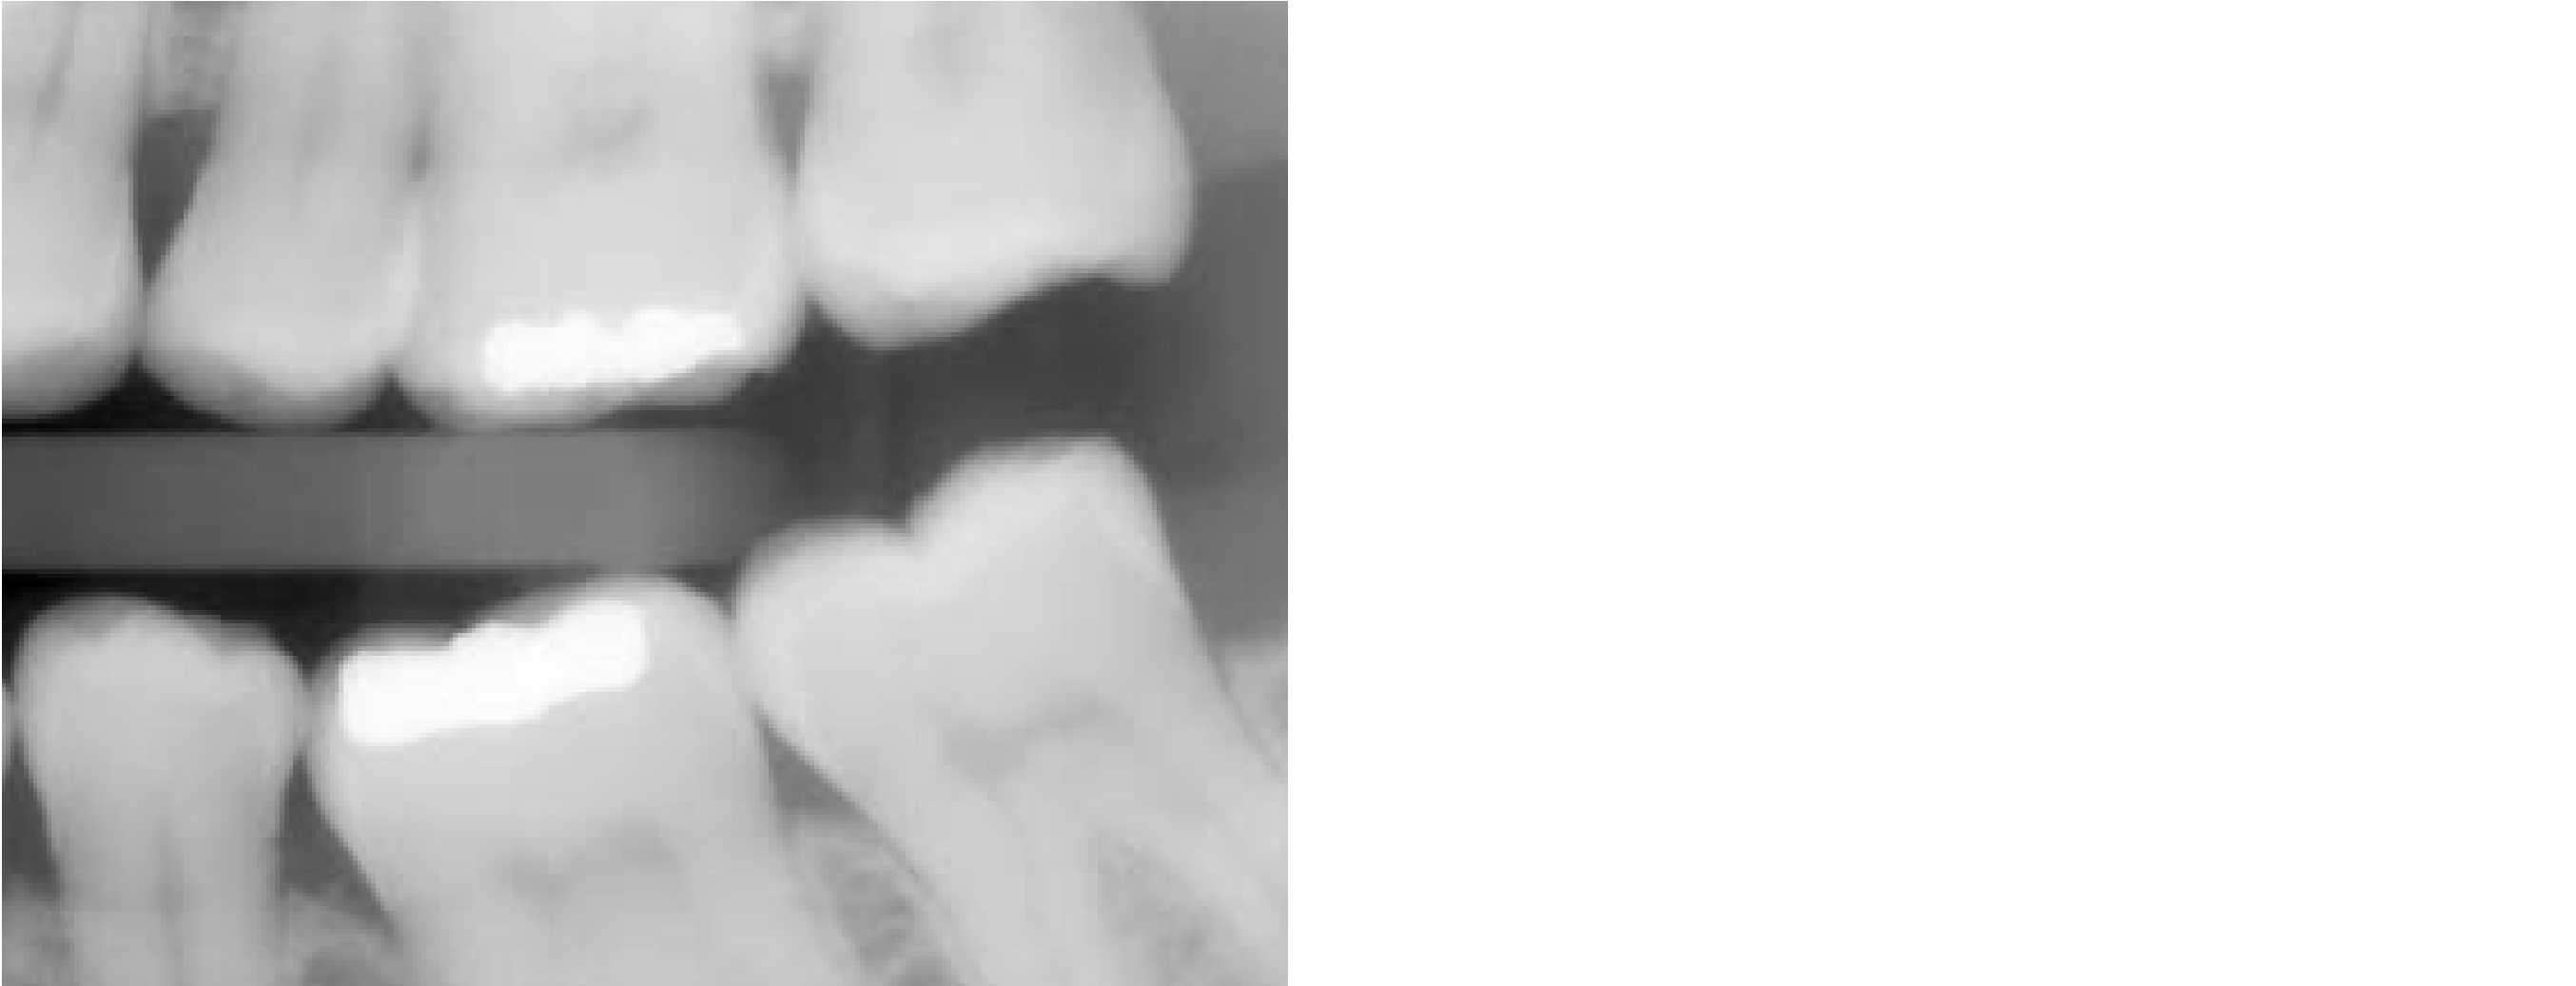

In [48]:
import cv2
from google.colab.patches import cv2_imshow
# Load the original image
original_image = cv.imread('/content/drive/MyDrive/PCVK/teeth.jpg')

# Create a mask with the same dimensions as the original image
mask = np.zeros_like(original_image)

# Define the region to be masked (example: a rectangle)
x, y, width, height = 100, 150, 300, 200
cv.rectangle(mask, (x, y), (x + width, y + height), (255, 255, 255), thickness=cv2.FILLED)

# Perform different logical operations with the mask and the original image
mask_and = cv.bitwise_and(original_image, mask)
mask_or = cv.bitwise_or(original_image, mask)
mask_not = cv.bitwise_not(original_image, mask)
mask_nand = cv.bitwise_not(mask_and)
mask_xor = cv.bitwise_xor(original_image, mask)

# Create a side-by-side comparison of the original and masked images
result_image = np.hstack((original_image,mask_and, mask_or, mask_not, mask_nand, mask_xor))

# Display the result image
print('Image Masking')
cv2_imshow(result_image)

# Wait for a key press and close the window
cv2.waitKey(0)
cv2.destroyAllWindows()
